<a href="https://colab.research.google.com/github/VaishnaviPunagin/DeepLearningLab/blob/main/ANN_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementation of ANN

##Import Required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


##Mouting the drive to access data file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


# #When done, 
# drive.flush_and_unmount()
# print('All changes made in this colab session should now be visible in Drive.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def get_stock_data(normalized=0):
    col_names = ['Date','Open','High','Low','Close','Volume','Adj Close']
    stocks = pd.read_csv(r"/content/drive/My Drive/EDELWEISSNS.csv", header=0, names=col_names)
    df = pd.DataFrame(stocks)
    date_split = df['Date'].str.split('-').str
    df['Year'], df['Month'], df['Day'] = date_split
    df["Volume"] = df["Volume"] / 10000
    return df

In [ ]:
df = get_stock_data(0)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
0,03-10-2008,41.299999,41.685001,39.400002,40.525002,0.002930,185090.0,03,10,2008
1,06-10-2008,39.700001,40.799999,37.200001,39.564999,0.002860,204340.0,06,10,2008
2,07-10-2008,40.000000,40.599998,36.000000,36.119999,0.002611,128970.0,07,10,2008
3,08-10-2008,35.000000,44.400002,34.500000,40.880001,0.002955,700490.0,08,10,2008
4,10-10-2008,40.400002,40.400002,35.299999,37.910000,0.002741,367380.0,10,10,2008


In [ ]:
df.drop(df.columns[[0,3,6, 7,8,9]], axis=1, inplace=True)
df.head()

,Open,High,Close,Volume
0,41.299999,41.685001,40.525002,0.002930
1,39.700001,40.799999,39.564999,0.002860
2,40.000000,40.599998,36.119999,0.002611
3,35.000000,44.400002,40.880001,0.002955
4,40.400002,40.400002,37.910000,0.002741


We get the stock data from Yahoo finance as a CSV, for any company.
Drop all other columns (Volume, Year, Month and Day) and retain Open, High and Close - since I'm just predicting the close value for a day

In [ ]:
def get_stock_data(normalized=0):
    col_names = ['Date','Open','High','Low','Close','Volume','Adj Close']
    stocks = pd.read_csv(r"/content/drive/My Drive/EDELWEISSNS.csv", header=0, names=col_names)
    df = pd.DataFrame(stocks)
    date_split = df['Date'].str.split('-').str
    df['Year'], df['Month'], df['Day'] = date_split
    df["Volume"] = df["Volume"] / 10000
    return df

In [ ]:
df = get_stock_data(0)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day
0,03-10-2008,41.299999,41.685001,39.400002,40.525002,0.002930,185090.0,03,10,2008
1,06-10-2008,39.700001,40.799999,37.200001,39.564999,0.002860,204340.0,06,10,2008
2,07-10-2008,40.000000,40.599998,36.000000,36.119999,0.002611,128970.0,07,10,2008
3,08-10-2008,35.000000,44.400002,34.500000,40.880001,0.002955,700490.0,08,10,2008
4,10-10-2008,40.400002,40.400002,35.299999,37.910000,0.002741,367380.0,10,10,2008


In [ ]:
df.drop(df.columns[[0,3,6, 7,8,9]], axis=1, inplace=True)
df.head()

,Open,High,Close,Volume
0,41.299999,41.685001,40.525002,0.002930
1,39.700001,40.799999,39.564999,0.002860
2,40.000000,40.599998,36.119999,0.002611
3,35.000000,44.400002,40.880001,0.002955
4,40.400002,40.400002,37.910000,0.002741


## Normalizing and removing the null data points

In [ ]:
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Volume'] = df['Volume']*100
df['Close'] = df['Close']/100
print(df)
nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0

        Open     High    Close    Volume
0     0.4130  0.41685  0.40525  0.292964
1     0.3970  0.40800  0.39565  0.286023
2     0.4000  0.40600  0.36120  0.261119
3     0.3500  0.44400  0.40880  0.295530
4     0.4040  0.40400  0.37910  0.274059
...      ...      ...      ...       ...
2440  2.9105  2.93400  2.88200  2.882000
2441  2.8960  2.89600  2.80500  2.805000
2442  2.8090  2.81750  2.74000  2.740000
2443  2.7625  2.79400  2.76200  2.762000
2444  2.7800  2.84300  2.79600  2.796000

[2445 rows x 4 columns]


In [ ]:
X = df[['High','Open', 'Volume']]
Y = df[['Close']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

In [ ]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (1956, 3)
y_train (1956, 1)
X_test (489, 3)
y_test (489, 1)


## Compiling and training the neural network 

In [ ]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_split=0.05)

Epoch 1/10
15/15 [==============================] - 1s 14ms/step - loss: 2.4762e-05 - val_loss: 3.6291e-05
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 2.4761e-06 - val_loss: 1.2479e-05
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 1.1519e-06 - val_loss: 1.3733e-06
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 2.4542e-07 - val_loss: 8.5795e-08
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 1.0371e-07 - val_loss: 3.7992e-08
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 8.5294e-08 - val_loss: 3.0936e-08
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 7.7959e-08 - val_loss: 4.6292e-08
Epoch 8/10
15/15 [==============================] - 0s 3ms/step - loss: 7.9710e-08 - val_loss: 3.3930e-08
Epoch 9/10
15/15 [==============================] - 0s 3ms/step - loss: 7.3497e-08 - val_loss: 3.0076e-08
Epoch 10/10
15/15 [==========================

##Predicted Values
Executed the trained model

In [ ]:
predictions = classifier.predict(X_test)
print(predictions[:10])

[[0.0110744 ]
 [0.01065184]
 [0.00998245]
 [0.01067572]
 [0.01069466]
 [0.0111172 ]
 [0.0109557 ]
 [0.01121686]
 [0.01207155]
 [0.01186244]]


## Calculating error in trained neural network model 

In [ ]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00 MSE (0.00 RMSE)
Test Score: 0.00 MSE (0.00 RMSE)


## Prediction vs actual results 

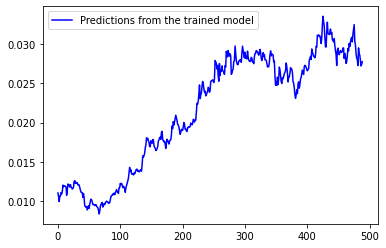

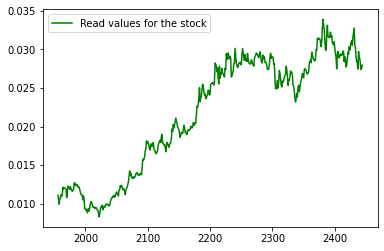

In [ ]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='blue', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='green', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()

#Implementation of CNN

In [1]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# to calculate accuracy
from sklearn.metrics import accuracy_score

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

11493376/11490434 [==============================] - 0s 0us/step
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Epoch 1/10
469/469 [==============================] - 40s 84ms/step - loss: 0.3694 - accuracy: 0.8884 - val_loss: 0.0742 - val_accuracy: 0.9761
Epoch 2/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0601 - accuracy: 0.9825 - val_loss: 0.0520 - val_accuracy: 0.9820
Epoch 3/10
469/469 [==============================] - 39s 84ms/step - loss: 0.0356 - accuracy: 0.9903 - val_loss: 0.0505 - val_accuracy: 0.9835
Epoch 4/10
469/469 [==============================] - 40s 85ms/step - loss: 0.0210 - accuracy: 0.9938 - val_loss: 0.0517 - val_accuracy: 0.9834
Epoch 5/10
469/469 [==============================] - 39s 84ms/step - loss: 0.0125 - accuracy: 0.9965 - val_loss: 0.0549 - val_accuracy: 0.9818
Epoch 6/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0090 - accuracy: 0.9976 - val_loss: 0.0521 - val_accu